In [1]:
%matplotlib inline  

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_helper_2.data_helper import completeanalysis

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


The package being used here., (data_helper_2) is developed and maintained by me. I have attached the essential parts of the code and can be installed by using
"pip install 

In [4]:
##Importing the data

df = pd.read_csv("pageblock.csv")
df.head()
df.columns= ['height','length','area','eccen','p_black','p_and','mean_tr','blackpix','blackand','wb_trans','classification']
df.classification = df.classification-1

In [5]:
# Adding dataframe to the analysis class
df_ca = completeanalysis(df)


creating separate list of numerical and categorical variables

categorical variable in the data... []

Numerical varialbles in the data... ['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'blackand', 'wb_trans']

Splitting the data for train and test purpose 80% and 20 percent respectively..

Creating stratified samples of 5 fold...

A simple stratified sample and K-fold startified sample is created.
 The same              sample is used for comparing performance of multiple models


#### Meta data information

In [6]:
df_ca.col_meta_data()

,Column Name,Number of NULL values,Number of Unique Values,Type
0,height,0.0,104,Numeric
1,length,0.0,452,Numeric
2,area,0.0,1395,Numeric
3,eccen,0.0,1511,Numeric
4,p_black,0.0,711,Numeric
5,p_and,0.0,700,Numeric
6,mean_tr,0.0,851,Numeric
7,blackpix,0.0,1069,Numeric
8,blackand,0.0,1718,Numeric
9,wb_trans,0.0,581,Numeric


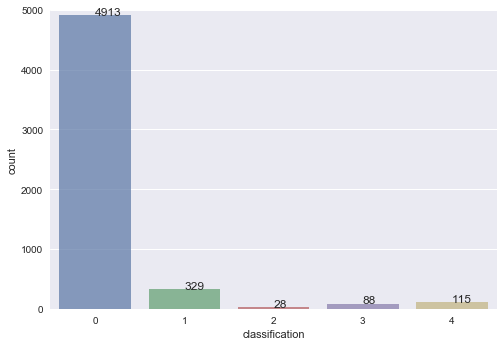

In [7]:
df_ca.response_distribution()

#### Visualisation

##### Univariate visualisation

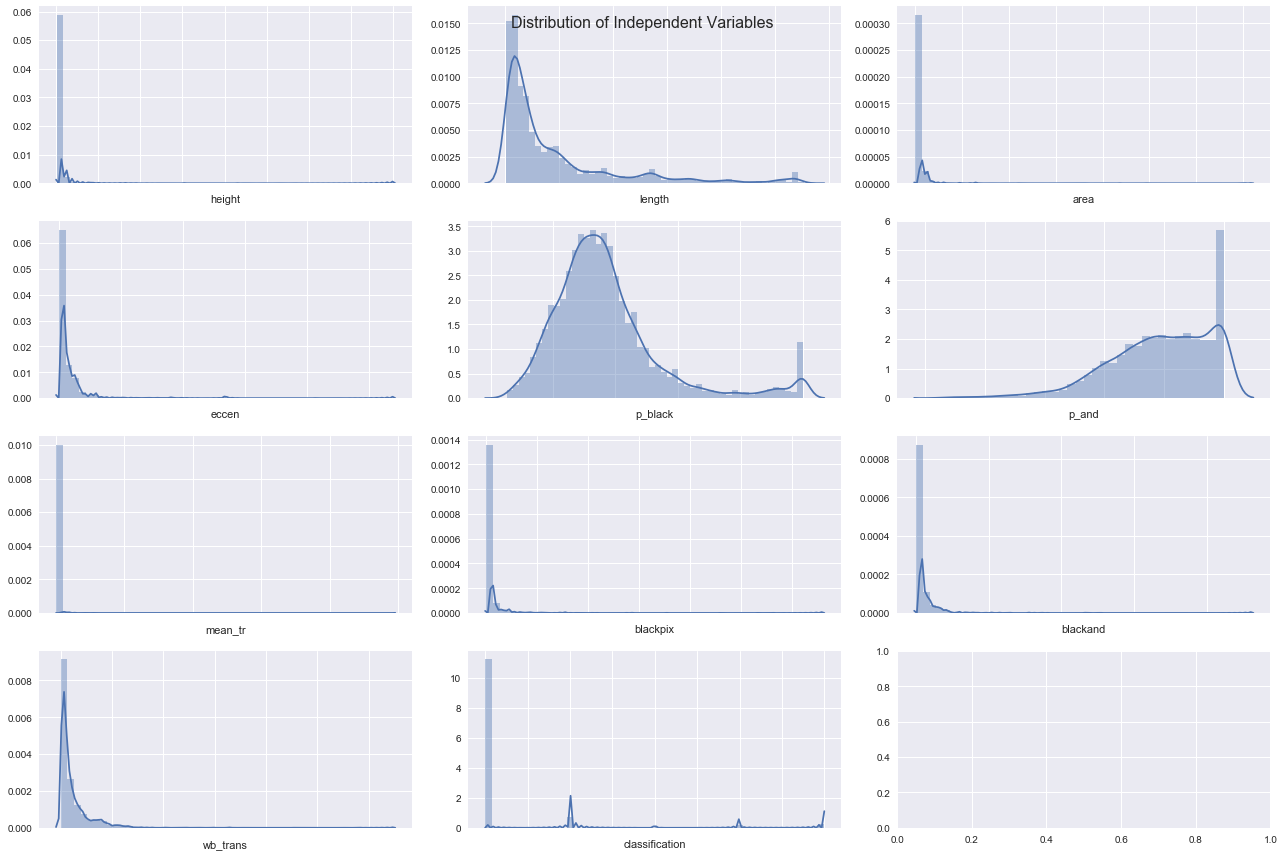

In [8]:
# showing all the distributions plots
df_ca.distribution_plots()

###### Observation:
All the distribution are skewed 

##### Bivariate visualisation

studying the correlation between all the variables

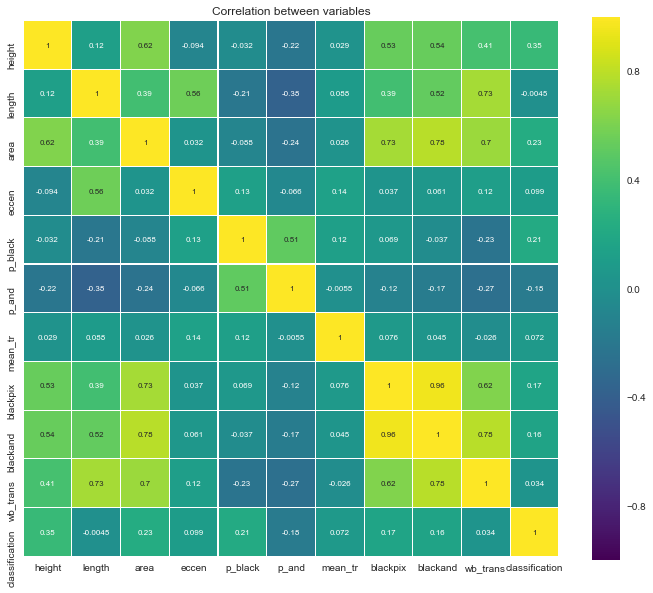

In [9]:
df_ca.correlation_plot()

visualization of having higher correlation than |0.5|

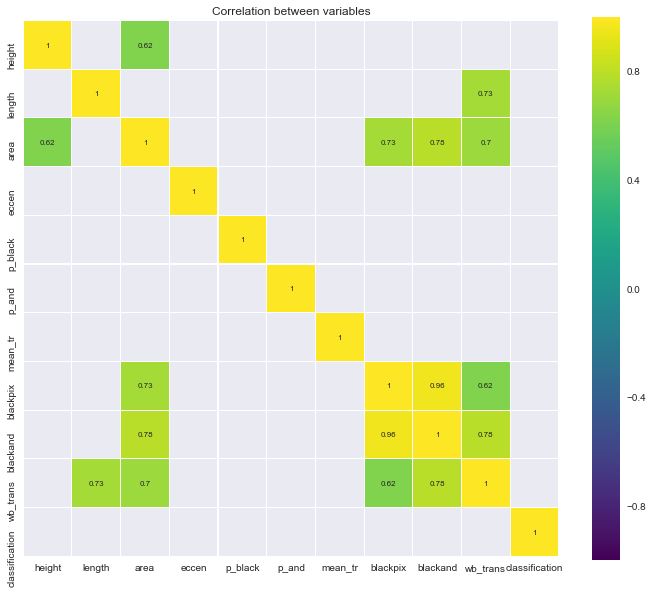

In [10]:
df_ca.correlation_plot(low=-0.6,high=0.6)

###### Observation:
We can observe some variables are highly correlated ., we have to check for multicollinearity in the further sections

especially 
1. blackand and blackpix  - 0.95 
2. blackand,blackpix and area - 0.75
3. wbtrans and (length, area, blackpix, blackand ) - (0.73,0.7,0.62,0.75)
4. height and area

seem to be highly correlated with each other,
area and height have high correlation

##### Pairplot of all the variables

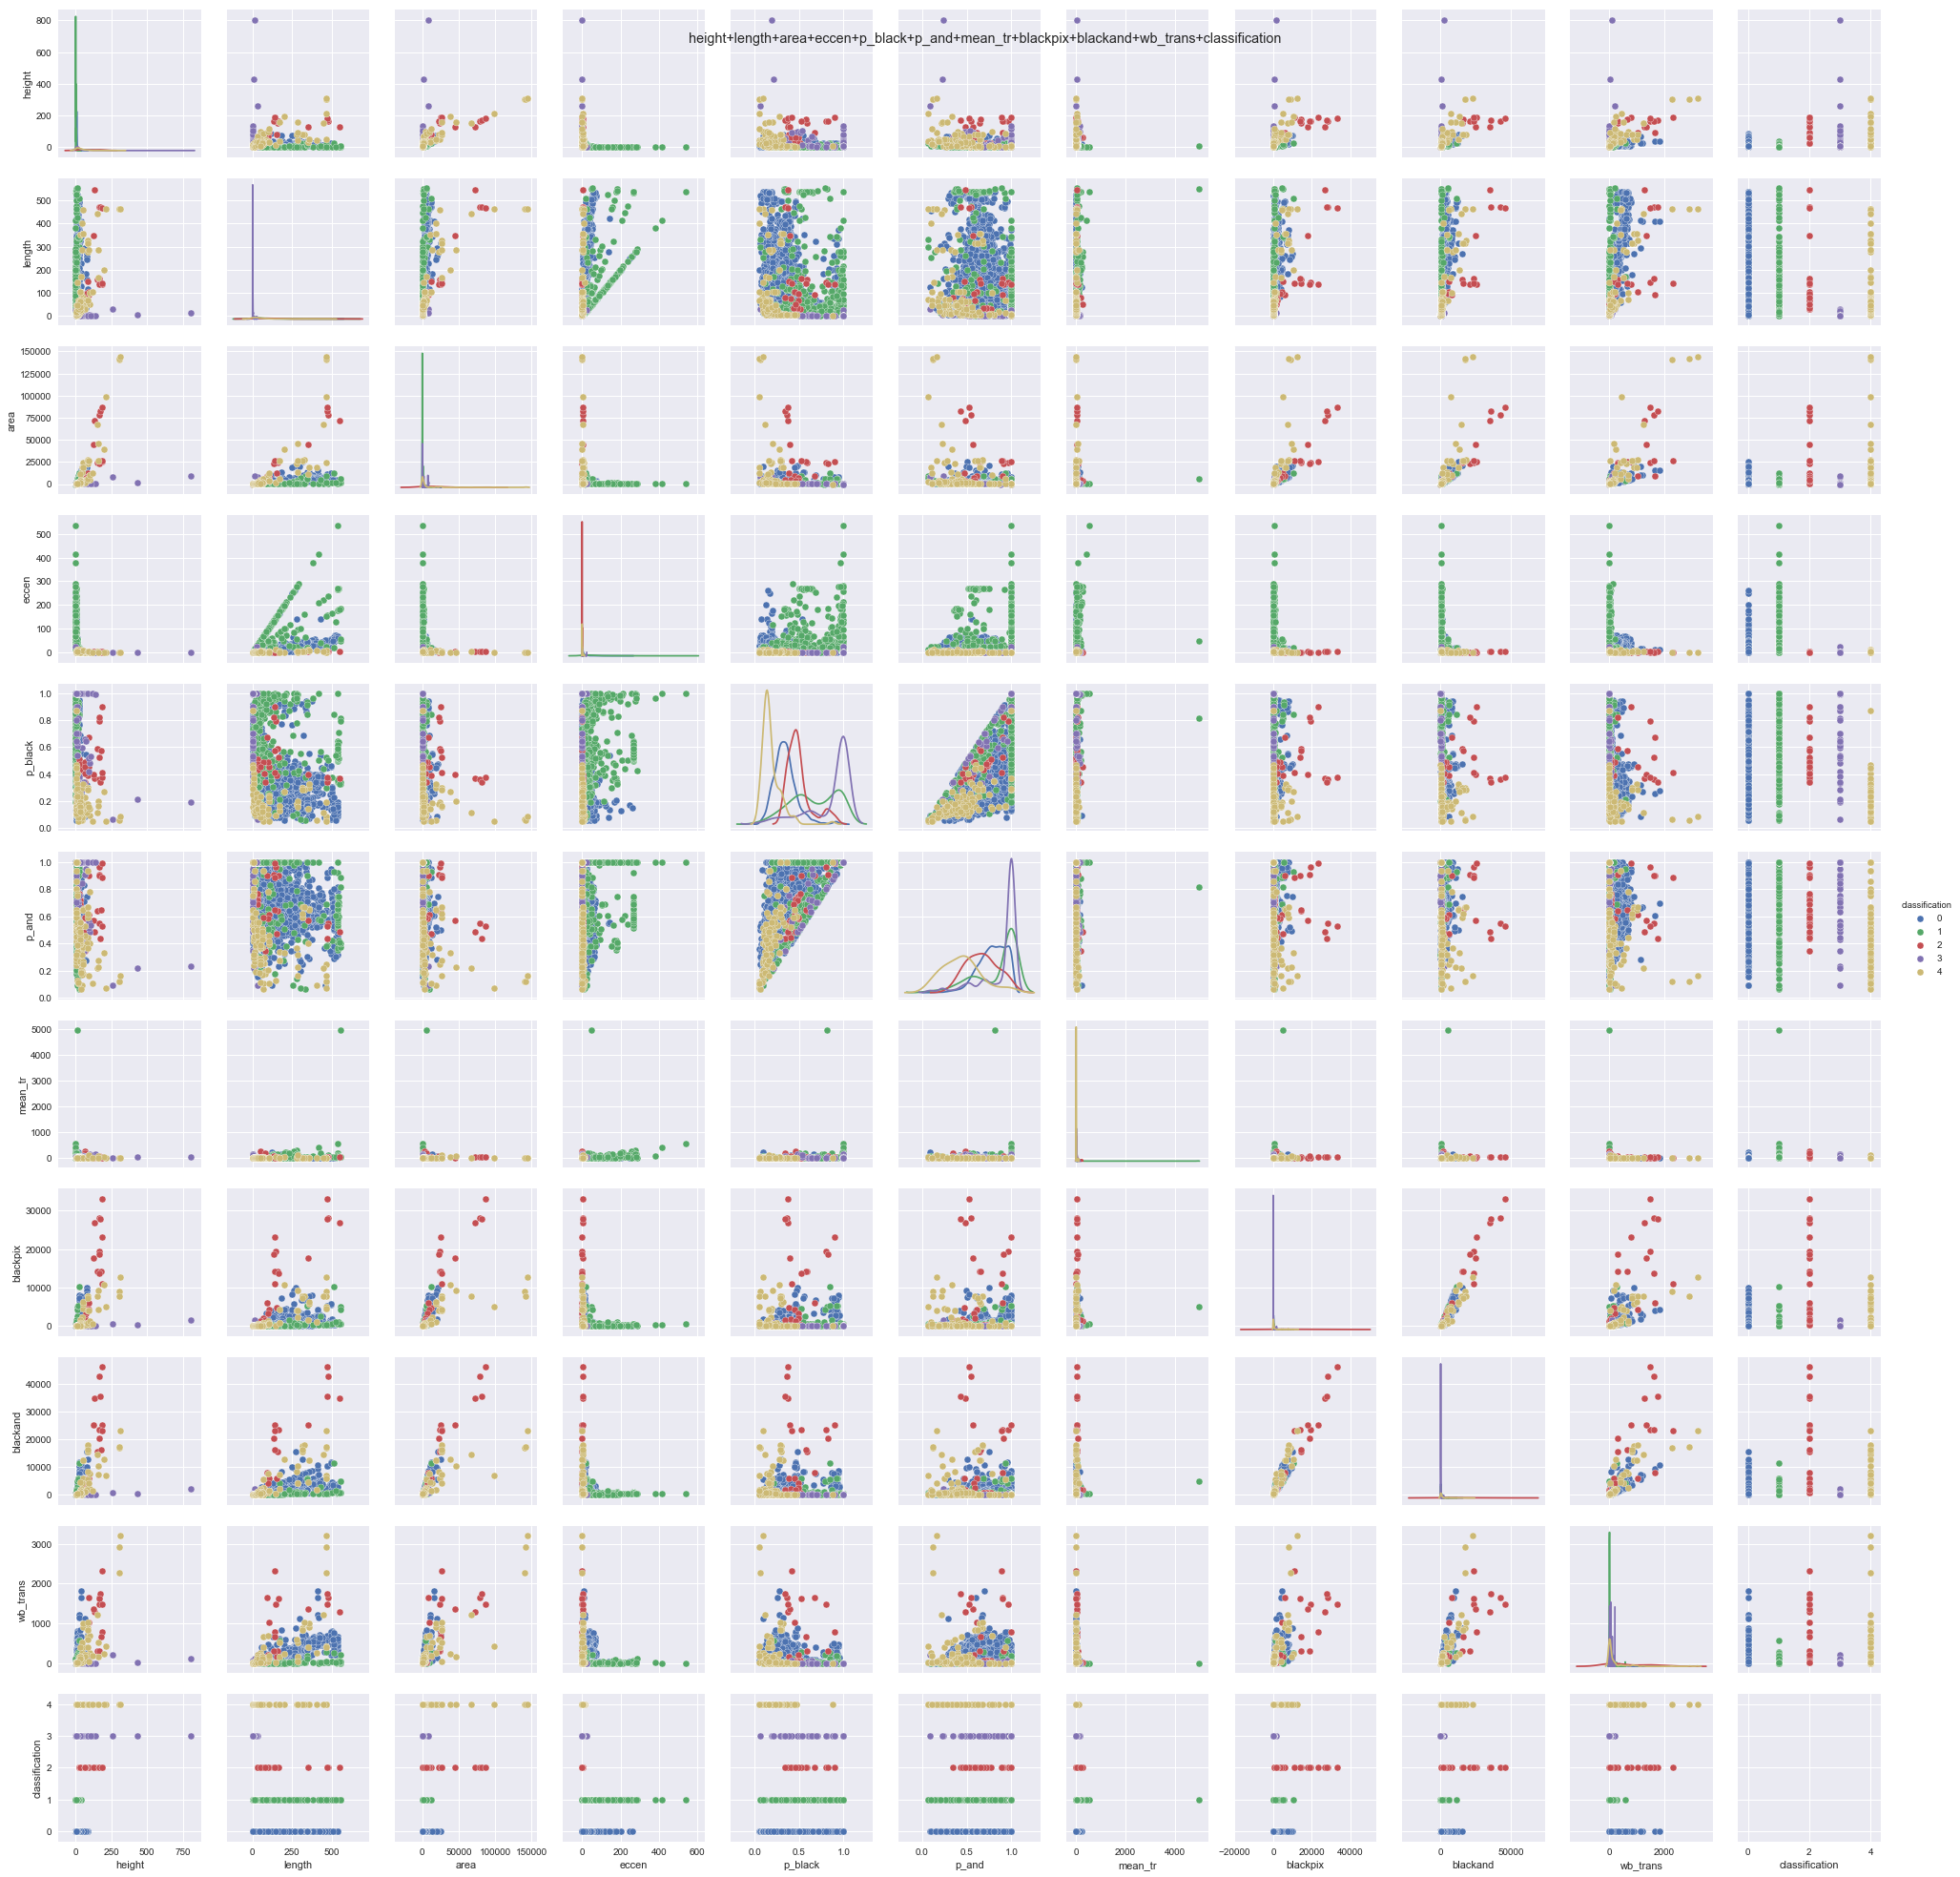

In [11]:
df_ca.pairplot()

comparing the variables which we suspect to have high correlation

In [12]:
import seaborn as sns

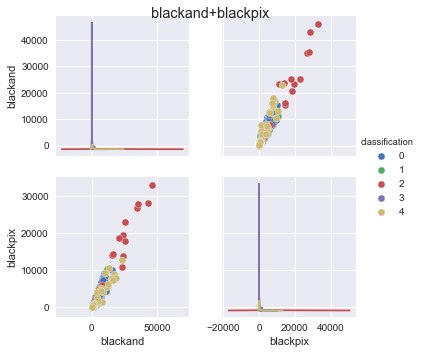

In [13]:
df_ca.pairplot(['blackand','blackpix'])

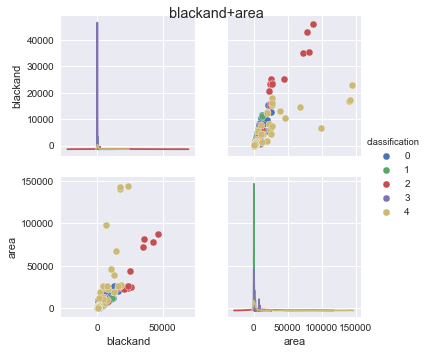

In [14]:
df_ca.pairplot(['blackand','area'])

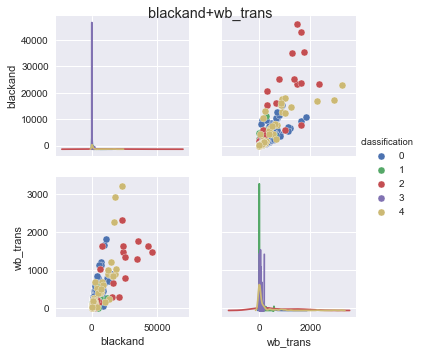

In [15]:
df_ca.pairplot(['blackand','wb_trans'])

##### Plot for the numerical depedent variables and categorical Independent variables

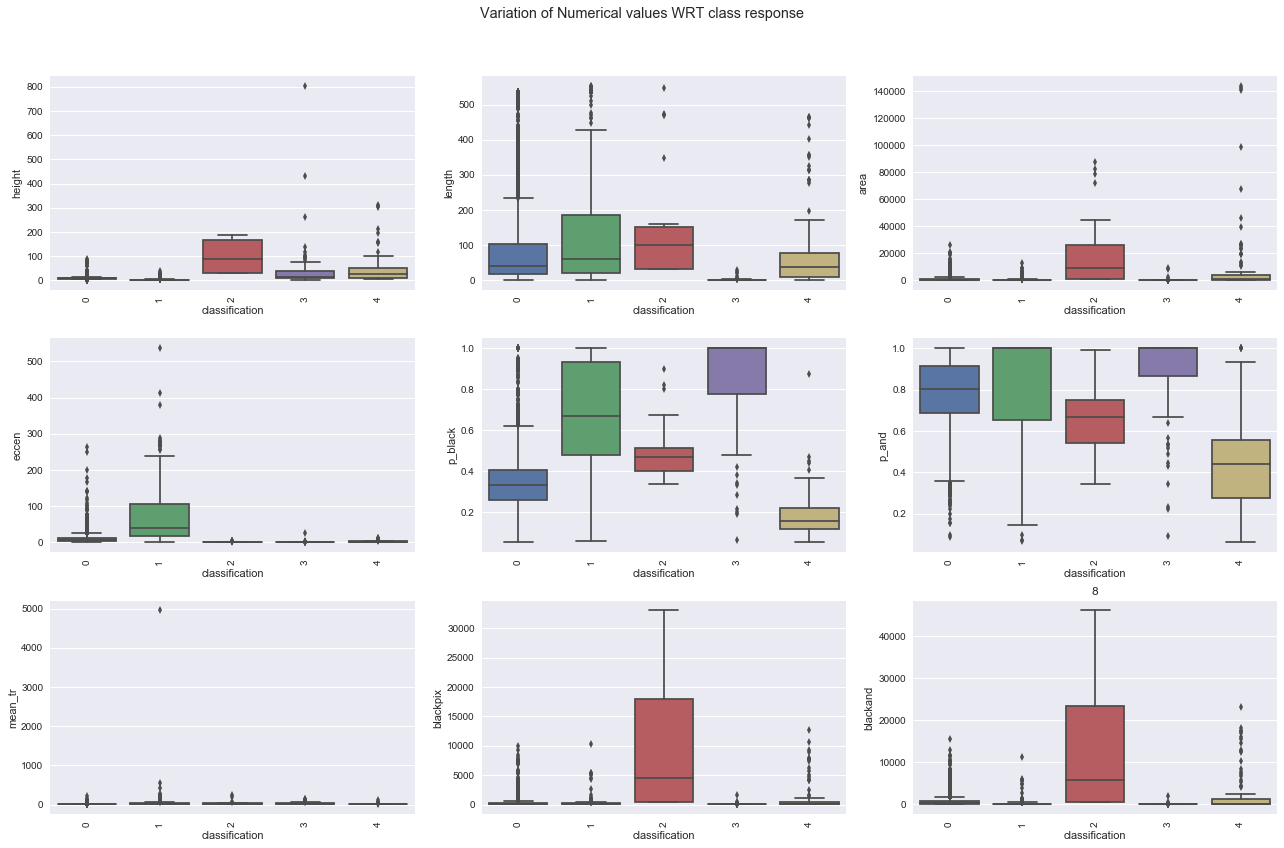

In [16]:
df_ca.boxplots()

###### Observations

All the variables are influenced by outliers

blackpix and blackand have similar distribution when it comes to all the classes
It seems all the distribution


##### Preliminary Feature elimination strategy

1. checking for variance inflation factor
2. checking for pvalue in multinominal logistic regression ( in R )

In [17]:
VIF = df_ca.variance_explained()
VIF

,Features,F Score,P Value,Support,VIF
0,height,436.524030,0.000000e+00,True,1.8
1,length,33.198844,2.122360e-27,True,5.7
2,area,251.063421,2.666377e-198,True,3.5
3,eccen,574.695126,0.000000e+00,True,2.3
4,p_black,696.405859,0.000000e+00,True,1.7
5,p_and,148.223104,1.573973e-120,True,1.7
6,mean_tr,34.117505,3.626194e-28,True,1.1
7,blackpix,587.079995,0.000000e+00,True,25.8
8,blackand,448.770720,0.000000e+00,True,39.5
9,wb_trans,135.335426,2.011844e-110,True,8.7


##### Observations:

we can accept variance inflation factor up to a value of 10

we can eliminate the either of the blackpix or blackand., we will go with blackand

In [18]:
from data_helper_2.data_helper import completeanalysis
df_ca = completeanalysis(df.drop('blackand',axis=1))


creating separate list of numerical and categorical variables

categorical variable in the data... []

Numerical varialbles in the data... ['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'wb_trans']

Splitting the data for train and test purpose 80% and 20 percent respectively..

Creating stratified samples of 5 fold...

A simple stratified sample and K-fold startified sample is created.
 The same              sample is used for comparing performance of multiple models


In [19]:
df_ca.variance_explained()

,Features,F Score,P Value,Support,VIF
0,height,436.524030,0.000000e+00,True,1.8
1,length,33.198844,2.122360e-27,True,5.7
2,area,251.063421,2.666377e-198,True,3.4
3,eccen,574.695126,0.000000e+00,True,2.3
4,p_black,696.405859,0.000000e+00,True,1.6
5,p_and,148.223104,1.573973e-120,True,1.7
6,mean_tr,34.117505,3.626194e-28,True,1.1
7,blackpix,587.079995,0.000000e+00,True,2.6
8,wb_trans,135.335426,2.011844e-110,True,5.5


###### Observations

Based on the F-score and VIF , also based on the pvalue from multi class logistic regression ( R results , python didn't converge'), we can choose the above 8 factors


Fitting the model in simple stratified sample 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Confusion matrix in the test dataset
[[977   5   0   0   1]
 [ 19  47   0   0   0]
 [  1   0   4   0   0]
 [  1   1   0  16   0]
 [ 16   0   0   0   7]]

The classification report for the fit..

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       983
          1       0.89      0.71      0.79        66
          2       1.00      0.80      0.89         5
          3       1.00      0.89      0.94        18
          4       0.88      0.30      0.45        23

avg / total       0.96      0.96      0.96      1095


The accuracy on the simple startified sample... 0.9598173515981735

Fitting the model on 5-Fold startified sample..


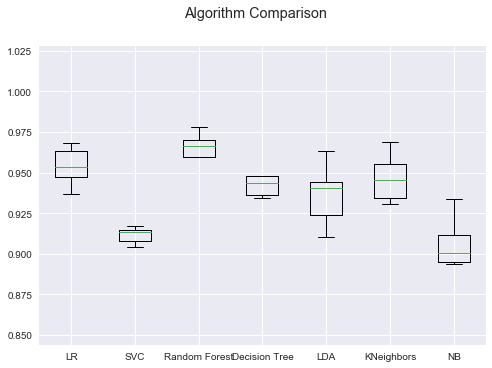

In [20]:
df_ca.compare_algorithm()

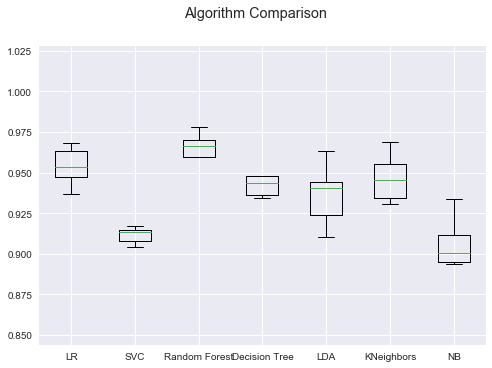

In [21]:
df_ca.plot_comparison_algorithm()

In [22]:
df_ca.best_fit_randomforest()

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed: 77.0min finished


{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 400}

Fitting the model in simple stratified sample 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Confusion matrix in the test dataset
[[975   5   0   1   2]
 [  6  59   0   1   0]
 [  2   0   3   0   0]
 [  0   1   0  17   0]
 [  9   0   0   0  14]]

The classification report for the fit..

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       983
          1       0.91      0.89      0.90        66
          2       1.00      0.60      0.75         5
          3  

In [28]:
from data_helper_2.data_helper import completeanalysis
df_ca = completeanalysis(df.drop('blackand',axis=1))


creating separate list of numerical and categorical variables

categorical variable in the data... []

Numerical varialbles in the data... ['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'wb_trans']

Splitting the data for train and test purpose 80% and 20 percent respectively..

Creating stratified samples of 5 fold...

A simple stratified sample and K-fold startified sample is created.
 The same              sample is used for comparing performance of multiple models


In [29]:
df_ca.best_fit_svc()

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 183.3min finished


{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

Fitting the model in simple stratified sample 
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix in the test dataset
[[977   3   0   0   3]
 [ 10  55   0   1   0]
 [  2   0   3   0   0]
 [  0   1   0  17   0]
 [  8   0   0   0  15]]

The classification report for the fit..

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       983
          1       0.93      0.83      0.88        66
          2       1.00      0.60      0.75         5
          3       0.94      0.94      0.94        18
          4       0.83      0.65      0.73        23

avg / total       0.97      0.97      0.97      1095


The accuracy on the simple startified sample... 0.9744292237442922

Fitting the model on 5-Fold startified samp